In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [2]:
data = pd.read_csv("/home/quant/Documents/Books_Python_I_Books_Finance/Analises/PETR4_SEMANAL/Petr4-Monday.csv")

In [3]:
data['Sinal de Compra'] = np.where((data['Open'] > data['Close'].shift(+1)) & (data['Close'] > data['Close'].shift(+1)), 1.0, 0.0)

In [4]:
data['Sinal de Venda'] = np.where((data['Open'] < data['Close'].shift(+1)) & (data['Close'] < data['Close'].shift(+1)), -1.0, 0.0)

TotalSignal = data['Sinal de Compra'].sum() + (data['Sinal de Venda'].sum()*-1)
Tradingdays = data['Close'].count()

prob = (TotalSignal/Tradingdays)*100

print ("Número de sinais: ", Tradingdays)
print ("Número total de trading: ", TotalSignal)
print ("Probabilidade: ", prob)

Número de sinais:  647
Número total de trading:  578.0
Probabilidade:  89.3353941267388


In [5]:
data.tail(5)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,SEMANA,Sinal de Compra,Sinal de Venda
642,3211,2022-12-12,24.580000,24.660000,23.129999,23.910000,23.910000,111293100,Monday,0.0,-1.0
643,3216,2022-12-19,22.100000,22.510000,21.639999,22.379999,22.379999,63074100,Monday,0.0,-1.0
644,3221,2022-12-26,25.120001,25.299999,24.820000,24.940001,24.940001,28765200,Monday,1.0,0.0
645,3225,2023-01-02,23.540001,23.809999,22.799999,22.920000,22.920000,78424700,Monday,0.0,-1.0
646,3230,2023-01-09,23.500000,24.000000,23.250000,23.870001,23.870001,46385200,Monday,1.0,0.0


In [6]:
data['buyqty'] = np.where((data['Low'] < data['Close'].shift(+1)), (data['Close']-data['Close'].shift(+1))*data['Sinal de Compra'], 0.0) 

data['sellqty'] = np.where((data['High'] > data['Close'].shift(+1)), (data['Close'].shift(+1) - data['Close'])*(data['Sinal de Venda']*-1), 0.0)

data['profit'] = data['buyqty'] + data['sellqty']
Totalprofit = data[data["Date"] > "2022-01-01"]['profit'].sum()
print("Ganho projetado: {:.2f}%".format(Totalprofit*100))

Ganho projetado: 224.00%


In [16]:
data.head(2)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,SEMANA,Sinal de Compra,Sinal de Venda,buyqty,sellqty,profit
0,0,2010-01-04,36.950001,37.32,36.820000,37.320000,13.817431,13303600,Monday,0.0,0.0,0.0,0.000000,0.000000
1,5,2010-01-11,37.209999,37.34,36.619999,36.830002,13.636016,15317700,Monday,0.0,-1.0,-0.0,0.489998,0.489998


In [7]:
capital_incial = 1000
ganhos = capital_incial * (Totalprofit)
print("Capital no final do mês é: R$ {:,.2f}".format(ganhos))

Capital no final do mês é: R$ 2,240.00


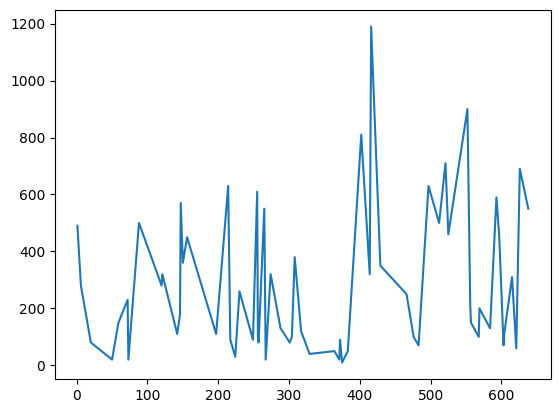

In [9]:
plt.plot(novo["profit"]*capital_incial)

In [13]:
series = pd.Series(data["profit"]*capital_incial)

In [14]:
cumsum = series.cumsum()

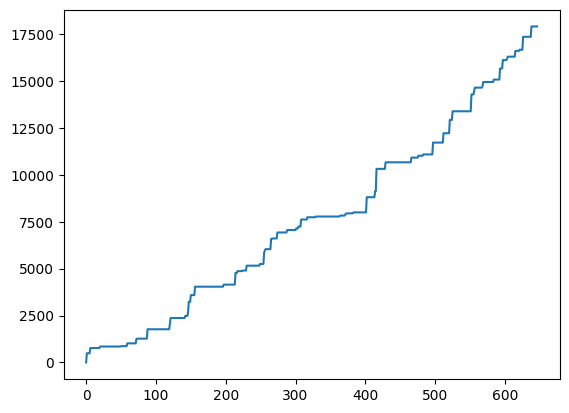

In [15]:
cumsum
plt.plot(cumsum)